Download all chimpanzee mRNA sequences in FASTA format

In [2]:
from Bio import Entrez

Entrez.email = "arezou.pst@gmail.com"
handle = Entrez.esearch (db = "nucleotide", term = "chimpanzee[orgn] AND biomol_mrna[PROP] ", usehistory = "y")
records_chim = Entrez.read (handle)

print (records_chim["Count"])

220625


In [3]:
out_handle = open ("chim_all_records.fasta", "w")
batch_size = 5000
count = int (records_chim["Count"])

for start in range(0, count, batch_size):
    end = min (count, start + batch_size)
    print("Going to download record %i to %i" % (start + 1, end))
    handle = Entrez.efetch (db = "nucleotide", 
                            retstart = start, 
                            query_key = records_chim["QueryKey"], 
                            webenv = records_chim["WebEnv"], 
                            retmax = batch_size,
                            rettype = "fasta", 
                            retmode = "text")
    
    chim_genes = handle.read()
    out_handle.write (chim_genes)
    handle.close()
    
out_handle.close()

Going to download record 1 to 5000
Going to download record 5001 to 10000
Going to download record 10001 to 15000
Going to download record 15001 to 20000
Going to download record 20001 to 25000
Going to download record 25001 to 30000
Going to download record 30001 to 35000
Going to download record 35001 to 40000
Going to download record 40001 to 45000
Going to download record 45001 to 50000
Going to download record 50001 to 55000
Going to download record 55001 to 60000
Going to download record 60001 to 65000
Going to download record 65001 to 70000
Going to download record 70001 to 75000
Going to download record 75001 to 80000
Going to download record 80001 to 85000
Going to download record 85001 to 90000
Going to download record 90001 to 95000
Going to download record 95001 to 100000
Going to download record 100001 to 105000
Going to download record 105001 to 110000
Going to download record 110001 to 115000
Going to download record 115001 to 120000
Going to download record 120001 to 12

3rd

In [6]:
import time
start_time = time.time()
from Bio import SeqIO

# Get the lengths and ids, and sort on length
len_and_ids = sorted(
(len(rec), rec.id) for rec in SeqIO.parse("chim_all_records.fasta", "fasta")
)
ids = reversed([id for (length, id) in len_and_ids])
del len_and_ids # free this memory

record_index = SeqIO.index("chim_all_records.fasta", "fasta")
with open("sorted_chim_all_records.fasta", "wb") as out_handle:
    for id in ids:
        out_handle.write(record_index.get_raw(id))
print("--- %s seconds ---" % (time.time() - start_time))

--- 20.252300024032593 seconds ---


4th

In [7]:
import time
start_time = time.time()
from Bio.SeqIO.FastaIO import SimpleFastaParser
from Bio import SeqIO

# Get the lengths and ids, and sort on length
with open("chim_all_records.fasta") as in_handle:
    len_and_ids = sorted(
    (len(seq), title.split(None, 1)[0])
    for title, seq in SimpleFastaParser(in_handle)
)
ids = reversed([id for (length, id) in len_and_ids])

del len_and_ids # free this memory
record_index = SeqIO.index("chim_all_records.fasta", "fasta")

with open("sorted2him_all_records.fasta", "wb") as out_handle:
    for id in ids:
        out_handle.write(record_index.get_raw(id))
print("--- %s seconds ---" % (time.time() - start_time))

--- 19.265239238739014 seconds ---


GC content of chimpanzee mRNA

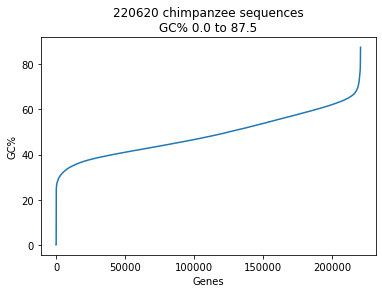

In [36]:
from Bio import SeqIO
from Bio.SeqUtils import GC
import pylab

gc_values = sorted(GC(rec.seq) for rec in SeqIO.parse("chim_all_records.fasta", "fasta"))

pylab.plot(gc_values)
pylab.title(
"%i chimpanzee sequences\nGC%% %0.1f to %0.1f"
% (len(gc_values), min(gc_values), max(gc_values))
)
pylab.xlabel("Genes")
pylab.ylabel("GC%")
pylab.show()

GC content of chimpanzee mitochondiral DNA

In [30]:
from Bio import Entrez

Entrez.email = "arezou.pst@gmail.com"   # Always tell NCBI who you are
handle = Entrez.efetch(db = "nucleotide",term = "Pan troglodytes[Organism] OR Pan troglodytes[All Fields]) AND mitochondrion[All Fields] AND complete[All Fields] AND genome[All Fields]", id = "NC_001643", rettype = "fasta", retmode = "text")
data = handle.read()

out_handle = open ("chimpmito.fasta", "w")
out_handle.write(data)
out_handle.close()
handle.close()

In [32]:
from Bio import Entrez

Entrez.email = "arezou.pst@gmail.com"   # Always tell NCBI who you are
handle = Entrez.efetch(db = "nucleotide",term = "Homo sapiens[orgn] OR Homo sapiens[All Fields]) AND mitochondrion[All Fields]", id = "NC_001807", rettype = "fasta", retmode = "text")
data = handle.read()

out_handle = open ("homomito.fasta", "w")
out_handle.write(data)
out_handle.close()
handle.close()

In [77]:
from Bio.Seq import Seq
from Bio.SeqUtils import GC
import pylab

gc_values=SeqIO.read("chimpmito.fasta", "fasta")
gc_val=gc_values.seq
print(gc_values.seq)
print(gc_values)
print(len(gc_values))
GC(gc_val)



GTTTATGTAGCTTACCCCCTCAAAGCAATACACTGAAAATGTTTCGACGGGTTTACATCACCCCATAAACAAACAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTACACATGCAAGCATCCCCGCCCCGTGAGTCACCCTCTAAATCGCCATGATCAAAAGGAACAAGTATCAAGCACGCAGCAATGCAGCTCAAAACGCTTAGCCTAGCCACACCCCCACGGGAGACAGCAGTGATAAACCTTTAGCAATAAACGAAAGTTTAACTAAGCCATACTAACCTCAGGGTTGGTCAATTTCGTGCTAGCCACCGCGGTCATACGATTAACCCAAGTCAATAGAAACCGGCGTAAAGAGTGTTTTAGATCACCCCCCCATAAAGCTAAAATTCACCTGAGTTGTAAAAAACTCCAGCTGATACAAAATAAACTACGAAAGTGGCTTTAACACATCTGAATACACAATAGCTAAGACCCAAACTGGGATTAGATACCCCACTATGCTTAGCCCTAAACTTCAACAGTTAAATTAACAAAACTGCTCGCCAGAACACTACGAGCCACAGCTTAAAACTCAAAGGACCTGGCGGTGCTTCATATCCCTCTAGAGGAGCCTGTTCTGTAATCGATAAACCCCGATCAACCTCACCGCCTCTTGCTCAGCCTATATACCGCCATCTTCAGCAAACCCTGATGAAGGTTACAAAGTAAGCACAAGTACCCACGTAAAGACGTTAGGTCAAGGTGTAGCCTATGAGGTGGCAAGAAATGGGCTACATTTTCTACCCCAGAAAATTACGATAACCCTTATGAAACCTAAGGGTCAAAGGTGGATTTAGCAGTAAACTAAGAGTAGAGTGCTTAGTTGAACAGGGCCCTGAAGCGCGTACACACCGCCCGTCACCCTCCTCAAGTATACTTCAAAGGATACTTAACTTAAACCCCCTACGTATTTATATAGAGGAGATAAGTCGTAACATGGTAAGTGTACTG

43.68732632596351

HOMO sapiens GC content

In [76]:
from Bio.Seq import Seq
from Bio.SeqUtils import GC
import pylab

gc_values1=SeqIO.read("homomito.fasta", "fasta")

gc_val2=gc_values1.seq
print(len(gc_values))
GC(gc_val)

16554


43.68732632596351